# Chapter 4 - Statistics Exercises

In [2]:
import numpy as np
import pandas as pd

import scipy.stats
from scipy import stats
from scipy.stats import norm
from scipy.stats import f

import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Linear Regression and Correlation (application)

Risk Factors Associated with Low Infant Birth Weight

Description:

     The ‘birthwt’ data frame has 189 rows and 10 columns.  The data
     were collected at Baystate Medical Center, Springfield, Mass
     during

     
Format:

     This data frame contains the following columns:

     ‘low’ indicator of birth weight less than 2.5 kg.

     ‘age’ mother's age in years.

     ‘lwt’ mother's weight in pounds at last menstrual period.

     ‘race’ mother's race (‘1’ = white, ‘2’ = black, ‘3’ = other).

     ‘smoke’ smoking status during pregnancy.

     ‘ptl’ number of previous premature labours.

     ‘ht’ history of hypertension.

     ‘ui’ presence of uterine irritability.

     ‘ftv’ number of physician visits during the first trimester.

     ‘bwt’ birth weight in grams.

Source:

     Hosmer, D.W. and Lemeshow, S. (1989) _Applied Logistic
     Regression._ New York: Wiley

In [5]:
# Read the text file into a pandas DataFrame
df = pd.read_csv('data/birthwt.txt', delimiter=',')

# Show the first few rows of the DataFrame
df.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


#### 1. Test the association of mother’s (bwt) age and birth weight using the correlation test and linear regeression.

y = 12.429712 x + 2655.744470, r: 0.090318, r-squared: 0.008157,

p-value: 0.216475, std_err: 10.022781

Regression line with the scatterplot:


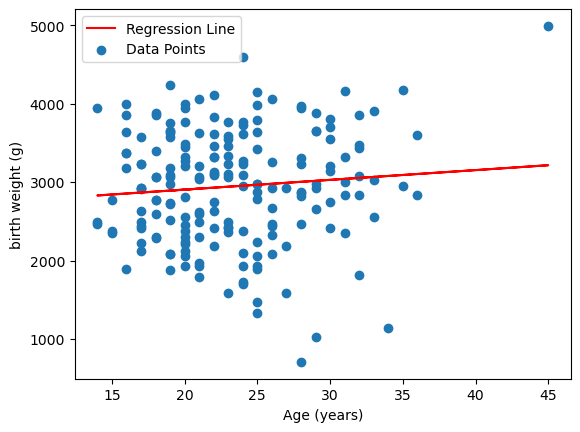

In [7]:
# Extract features from the DataFrame
y, x = df['bwt'], df['age']

# Perform linear regression using scipy's linregress function
beta, beta0, r_value, p_value, std_err = stats.linregress(x, y)

# Print the regression equation and statistics
print("y = %f x + %f, r: %f, r-squared: %f,\n\np-value: %f, std_err: %f"
    % (beta, beta0, r_value, r_value**2, p_value, std_err))
print()

# Plot the regression line with the scatterplot of the data
print("Regression line with the scatterplot:")
yhat = beta * x + beta0  # Calculate the predicted values (regression line)

# Plot the regression line and the scatter plot
plt.plot(x, yhat, 'r-', label='Regression Line')  # Plot the regression line in red
plt.scatter(x, y, label='Data Points')            # Plot the actual data points
plt.xlabel('Age (years)')                         # Label the x-axis
plt.ylabel('birth weight (g)')                    # Label the y-axis
plt.legend()                                      # Show the legend
plt.show()                                        # Display the plot

A p-value greater than 0.05 (specifically 0.2165) indicates that the relationship between age and birth weight is not statistically significant. Therefore, we fail to reject the null hypothesis, meaning **there is no strong evidence that age has a significant effect on birth weight**. The relatively large standard error of 10.02 indicates some uncertainty in the estimated slope, further reinforcing the weak relationship between the variables.

The correlation coefficient and the r-squared value both suggest a very weak linear relationship between the mother's age and the birth weight of the child. The mother's age explains very little of the variation in birth weight.

#### 2. Test the association of mother’s weight (lwt) and birth weight using the correlation test and linear regeression.

y = 4.429108 x + 2369.623518, r: 0.185733, r-squared: 0.034497,

p-value: 0.010504, std_err: 1.713494

Regression line with the scatterplot:


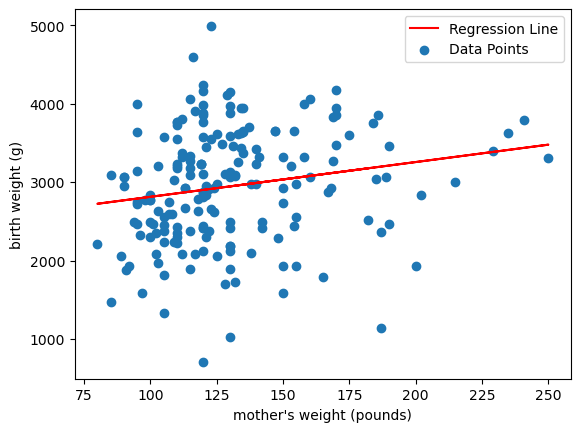

In [10]:
# Extract features from the DataFrame
y, x = df['bwt'], df['lwt']

# Perform linear regression using scipy's linregress function
beta, beta0, r_value, p_value, std_err = stats.linregress(x, y)

# Print the regression equation and statistics
print("y = %f x + %f, r: %f, r-squared: %f,\n\np-value: %f, std_err: %f"
    % (beta, beta0, r_value, r_value**2, p_value, std_err))
print()

# Plot the regression line with the scatterplot of the data
print("Regression line with the scatterplot:")
yhat = beta * x + beta0  # Calculate the predicted values (regression line)

# Plot the regression line and the scatter plot
plt.plot(x, yhat, 'r-', label='Regression Line')  # Plot the regression line in red
plt.scatter(x, y, label='Data Points')            # Plot the actual data points
plt.xlabel("mother's weight (pounds)")            # Label the x-axis
plt.ylabel('birth weight (g)')                    # Label the y-axis
plt.legend()                                      # Show the legend
plt.show()                                        # Display the plot

A p-value of 0.0105 is less than 0.05, which means the relationship between the mother's weight and birth weight is statistically significant. Thus, we can reject the null hypothesis and conclude that **there is evidence of a relationship between the mother's weight and birth weight.**The standard error is relatively small compared to the slope, indicating that the slope estimate is fairly precise.

Weak Linear Relationship: The r-value of 0.1857 and r-squared of 0.0345 indicate a weak positive linear relationship between the mother's weight and birth weight. While the relationship exists, the mother's weight explains only a small proportion of the variation in birth weight. 

Statistically Significant: The p-value of 0.0105 indicates that the relationship between the mother's weight and birth weight is statistically significant, meaning that the slope is unlikely to be zero. However, despite the statistical significance, the relationship is weak in terms of practical significance.

#### 3. Produce two scatter plot of: (i) age by birth weight; (ii) mother’s weight by birth weight.

Text(0.5, 1.0, "Mother's Weight vs Birth Weight")

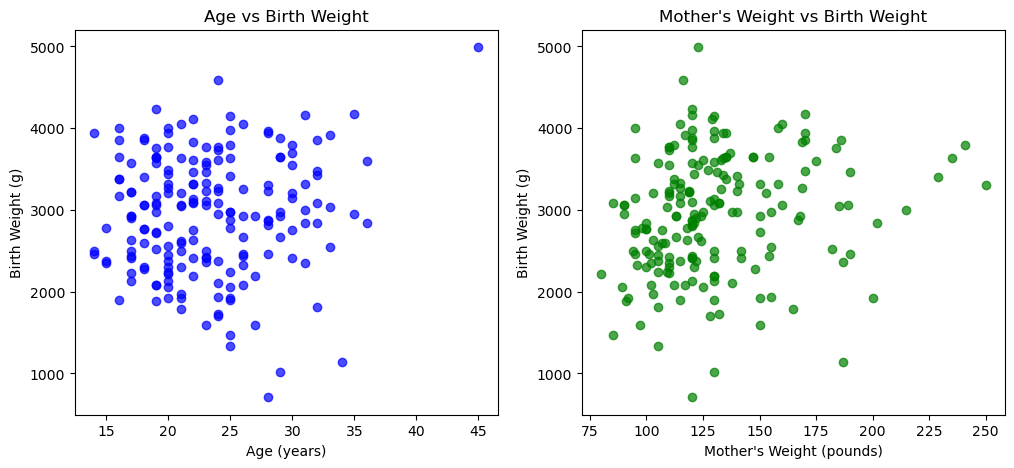

In [13]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot (i) age by birth weight
axes[0].scatter(df['age'], df['bwt'], color='blue', alpha=0.7)
axes[0].set_xlabel('Age (years)')            # X-axis label
axes[0].set_ylabel('Birth Weight (g)')       # Y-axis label
axes[0].set_title('Age vs Birth Weight')     # Title for the first plot

# Plot (ii) mother’s weight by birth weight
axes[1].scatter(df['lwt'], df['bwt'], color='green', alpha=0.7)
axes[1].set_xlabel("Mother's Weight (pounds)")  # X-axis label
axes[1].set_ylabel('Birth Weight (g)')          # Y-axis label
axes[1].set_title("Mother's Weight vs Birth Weight")  # Title for the second plot

####  Conclusion Based on the Scatter Plots:

1. `Age vs Birth Weight (Left Plot)`:
Scatter Distribution: The data points are quite scattered, with no clear pattern indicating a strong relationship between the mother's age and the birth weight of the child. The points are widely spread across the entire range of ages, from around 15 to 45 years.
Lack of Correlation: There doesn't appear to be any visible upward or downward trend, suggesting a weak or no correlation between the mother's age and the birth weight. This visual representation aligns with the previously computed weak correlation and low r-squared value, indicating that mother's age is not a strong predictor of birth weight.

2. `Mother’s Weight vs Birth Weight (Right Plot)`:
Moderate Clustering: There seems to be a slight positive relationship between mother's weight and birth weight, with most of the points showing higher birth weights associated with higher maternal weights. However, this relationship is not very strong as the points still show significant scatter.
Outliers: There are some extreme outliers, especially at higher maternal weights (above 175 pounds), which do not follow the general trend. These outliers may affect the overall interpretation of the relationship.
Potential Positive Correlation: While there is a slight upward trend, the relationship remains weak, as suggested by the previously low r-squared value. This indicates that while maternal weight may have some influence on birth weight, it is not a dominant factor on its own.

**Overall Conclusion:**
Mother’s age does not appear to have a significant influence on birth weight, as indicated by the widespread distribution of points with no clear trend in the left plot.
Mother’s weight shows a slightly positive but weak relationship with birth weight, suggesting that while it may have some effect, other factors likely play a more significant role in determining birth weight.
These findings align with the previous regression analysis, where both age and mother's weight were found to have weak correlations with birth weight, and neither variable alone is a strong predictor of birth weight.

## Simple Linear Regression (maths)

In [16]:
# Read the text file into a pandas DataFrame
df2 = pd.read_csv('data/salary_table.txt', delimiter=',')

# Show the first few rows of the DataFrame
df2.head()

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


#### Compute:

• Estimate the model paramters 𝛽, 𝛽0 using scipy stats.linregress(x,y)

• Compute the predicted values 𝑦

In [18]:
# Extract salary and experience data from the DataFrame
y, x = df2['salary'], df2['experience']

# Perform linear regression using scipy's linregress function
beta, beta0, r_value, p_value, std_err = stats.linregress(x, y)

# Print the regression equation and statistics
print("y = %f x + %f, r: %f, r-squared: %f,\n\np-value: %f, std_err: %f"
    % (beta, beta0, r_value, r_value**2, p_value, std_err))

y = 491.486913 x + 13584.043803, r: 0.538886, r-squared: 0.290398,

p-value: 0.000112, std_err: 115.823381


In [19]:
# Predicted values using the regression line
yhat = beta * x + beta0  # Predicted values (regression line)

yhat[:5]

0    14075.530717
1    14075.530717
2    14075.530717
3    14075.530717
4    14075.530717
Name: experience, dtype: float64

#### Compute:

• 𝑦¯: y_mu

• 𝑆𝑆tot: ss_tot

• 𝑆𝑆

reg: ss_reg

• 𝑆𝑆res: ss_res

In [21]:
# 𝑦¯: Mean of y (y_mu)
y_mu = np.mean(y)

# 𝑆𝑆tot: Total sum of squares (ss_tot)
ss_tot = np.sum((y - y_mu) ** 2)

# 𝑆𝑆reg: Regression sum of squares (ss_reg)
ss_reg = np.sum((yhat - y_mu) ** 2)

# 𝑆𝑆res: Residual sum of squares (ss_res)
ss_res = np.sum((y - yhat) ** 2)

# Print the computed values
print("\nComputed Values:\n")
print(f"y_mu (mean of y): {y_mu:.3f}")
print(f"SS_tot (total sum of squares): {ss_tot:.3f}")
print(f"SS_reg (regression sum of squares): {ss_reg:.3f}")
print(f"SS_res (residual sum of squares): {ss_res:.3f}")


Computed Values:

y_mu (mean of y): 17270.196
SS_tot (total sum of squares): 1001097577.239
SS_reg (regression sum of squares): 290716720.831
SS_res (residual sum of squares): 710380856.408


#### Compute:

• Check partition of variance formula based on sum of squares by using assert np.allclose(val1, val2, atol=1e-05)

• Compute 𝑅2 and compare it with the r_value above

• Compute the 𝐹 score

• Compute the 𝑝-value:

• Plot the 𝐹(1, 𝑛) distribution for 100 𝑓 values within [10, 25]. Draw 𝑃(𝐹(1, 𝑛) > 𝐹), 
i.e. color the surface defined by the 𝑥 values larger than 𝐹 below the 𝐹(1, 𝑛).

• 𝑃(𝐹(1, 𝑛) > 𝐹) is the 𝑝-value, compute it.

##### Check partition of variance formula based on sum of squares by using assert np.allclose(val1, val2, atol=1e-05)

In [24]:
# Check the partition of variance formula
assert np.allclose(ss_tot, ss_reg + ss_res, atol=1e-05), "Partition of variance does not hold!"
print("Partition of variance holds!")

Partition of variance holds!


##### Compute 𝑅2 and compare it with the r_value above

In [26]:
# Compute R^2
R_squared = ss_reg / ss_tot
print(f"Computed R^2: {R_squared:.5f}, r_value^2: {r_value**2:.5f}")

# Compare the computed R^2 with r_value squared
assert np.allclose(R_squared, r_value**2, atol=1e-05), "R^2 values do not match!"

Computed R^2: 0.29040, r_value^2: 0.29040


##### Compute the 𝐹 score

In [28]:
# Degrees of freedom
n = len(y)       # Number of samples
dof_reg = 1      # Degrees of freedom for regression (1 predictor)
dof_res = n - 2  # Degrees of freedom for residuals

# Compute F-statistic
F = (ss_reg / dof_reg) / (ss_res / dof_res)
print(f"Computed F-statistic: {F:.5f}")

Computed F-statistic: 18.00659


##### Compute the 𝑝-value:

In [30]:
# The p-value for the F-statistic can be computed using the survival function of the F-distribution:
# p = P(F(1, n−2) > F)

# Compute p-value from the F-statistic
p_val = f.sf(F, dfn=dof_reg, dfd=dof_res)
print(f"Computed p-value: {p_val:.5f}")

Computed p-value: 0.00011


##### Plot the 𝐹(1, 𝑛) distribution for 100 𝑓 values within [10, 25]. Draw 𝑃(𝐹(1, 𝑛) > 𝐹), i.e. color the surface defined by the 𝑥 values larger than 𝐹 below the 𝐹(1, 𝑛).

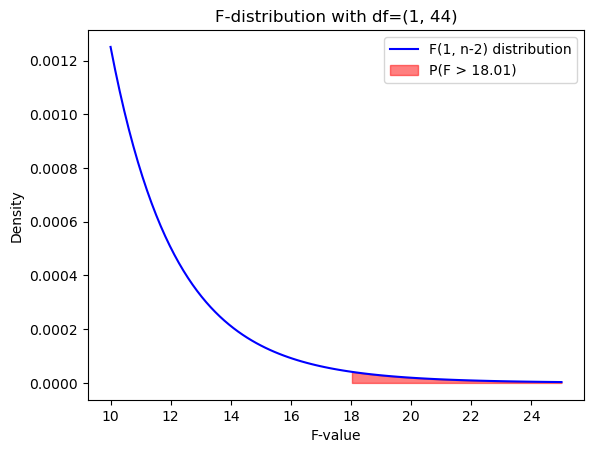

In [32]:
# Create 100 f-values within the range [10, 25]
f_values = np.linspace(10, 25, 100)

# Compute the F-distribution with dfn=1 and dfd=n-2
f_dist_values = f.pdf(f_values, dfn=dof_reg, dfd=dof_res)

# Plot the F-distribution
plt.plot(f_values, f_dist_values, 'b-', label="F(1, n-2) distribution")

# Shade the region where F-values are larger than the computed F-statistic
plt.fill_between(f_values, 0, f_dist_values, where=(f_values > F), color='red', alpha=0.5, label=f'P(F > {F:.2f})')

# Add labels and title
plt.xlabel('F-value')
plt.ylabel('Density')
plt.title(f'F-distribution with df=(1, {dof_res})')
plt.legend()
plt.show();

##### 𝑃(𝐹(1, 𝑛) > 𝐹) is the 𝑝-value, compute it.

In [34]:
# Already computed as p_val
print(f"P(F(1, {dof_res}) > F) is the p-value: {p_val:.5f}")

P(F(1, 44) > F) is the p-value: 0.00011


# Multiple Regression
Considering the simulated data used below:

In [36]:
import numpy as np
from scipy import linalg

# Set a random seed for reproducibility
np.random.seed(seed=42)

# Dataset
N, P = 50, 4  # N = number of samples (rows), P = number of features (columns)
X = np.random.normal(size=N * P).reshape((N, P))  # Generate random normally distributed data and reshape into N x P matrix

# Add an intercept term (a column of 1s) to the first column of X
X[:, 0] = 1
print(X[:5, :])  # Print the first 5 rows of X to inspect the matrix with intercept added

# True parameters (the "true" beta coefficients for the regression)
betastar = np.array([10, 1., .5, 0.1])  # True beta coefficients for the model

# Generate the target variable (y) using the true model with some random noise (e)
e = np.random.normal(size=N)  # Random noise (errors)
y = np.dot(X, betastar) + e   # Compute y = X * betastar + error (the true model with noise)

# Estimate the parameters (betahat) using the pseudoinverse of X
Xpinv = linalg.pinv(X)        # Use linalg.pinv() instead of pinv2()
betahat = np.dot(Xpinv, y)

# Print the estimated beta coefficients
print("\nEstimated beta coefficients:\n", betahat)

[[ 1.         -0.1382643   0.64768854  1.52302986]
 [ 1.         -0.23413696  1.57921282  0.76743473]
 [ 1.          0.54256004 -0.46341769 -0.46572975]
 [ 1.         -1.91328024 -1.72491783 -0.56228753]
 [ 1.          0.31424733 -0.90802408 -1.4123037 ]]

Estimated beta coefficients:
 [10.14742501  0.57938106  0.51654653  0.17862194]


#### 1. What are the dimensions of pinv(𝑋)?

In [38]:
print("Shape of pinv(X):", Xpinv.shape)  # (columns, rows)

Shape of pinv(X): (4, 50)


#### 2. Compute the MSE between the predicted values and the true values

In [40]:
# Compute the predicted values using the estimated beta coefficients
y_pred = np.dot(X, betahat)  # Predicted values: y_pred = X * betahat

# Compute the Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)  # MSE = mean((true values - predicted values)^2)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.0130389279389576


## Two sample t-test (maths)

Given the following two sample, test whether their means are equals.

In [42]:
height = np.array([ 1.83, 1.83, 1.73, 1.82, 1.83,
                    1.73,1.99, 1.85, 1.68, 1.87,
                    1.66, 1.71, 1.73, 1.64, 1.70,
                    1.60, 1.79, 1.73, 1.62, 1.77])

grp = np.array(["M"] * 10 + ["F"] * 10)

print('height:', height)
print()
print('grp:', grp)

height: [1.83 1.83 1.73 1.82 1.83 1.73 1.99 1.85 1.68 1.87 1.66 1.71 1.73 1.64
 1.7  1.6  1.79 1.73 1.62 1.77]

grp: ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F']


##### Compute the means/std-dev per groups.

In [44]:
# Calculate means and std-dev per group (Male and Female)
mean_m = np.mean(height[grp == "M"])        # Mean height for males
std_m = np.std(height[grp == "M"], ddof=1)  # Standard deviation for males (sample std-dev)

mean_f = np.mean(height[grp == "F"])        # Mean height for females
std_f = np.std(height[grp == "F"], ddof=1)  # Standard deviation for females (sample std-dev)

# Print the results
print(f"Mean height for males: {mean_m:.2f} m, Std-dev: {std_m:.2f} m")
print(f"Mean height for females: {mean_f:.2f} m, Std-dev: {std_f:.2f} m")

Mean height for males: 1.82 m, Std-dev: 0.09 m
Mean height for females: 1.69 m, Std-dev: 0.06 m


##### Compute the 𝑡-value (standard two sample t-test with equal variances).

In [46]:
# Group statistics
mean_m = np.mean(height[grp == "M"])        # Mean for males
std_m = np.std(height[grp == "M"], ddof=1)  # Sample std dev for males
n_m = np.sum(grp == "M")                    # Number of males

mean_f = np.mean(height[grp == "F"])        # Mean for females
std_f = np.std(height[grp == "F"], ddof=1)  # Sample std dev for females
n_f = np.sum(grp == "F")                    # Number of females

# Pooled variance (s_p^2)
pooled_var = (((n_m - 1) * std_m**2) + ((n_f - 1) * std_f**2)) / (n_m + n_f - 2)

# Compute t-value
t_value = (mean_m - mean_f) / np.sqrt(pooled_var * (1/n_m + 1/n_f))

# Print the t-value
print(f"t-value: {t_value:.5f}")

t-value: 3.55115


##### Compute the 𝑝-value.

For a two-tailed test, the p-value is computed as:

    p=2×P(T>∣t∣)
    
    Where:

    T is the t-distribution with 𝑛1 + 𝑛2 −2 degrees of freedom (df).
    t is the computed t-value.

In [49]:
# Degrees of freedom
dof = n_m + n_f - 2

# Compute p-value (two-tailed test)
p_value = 2 * (1 - stats.t.cdf(np.abs(t_value), df=dof))

# Print the t-value and p-value
print(f"p-value: {p_value:.5f}")

p-value: 0.00228


A small p-value (typically less than 0.05) suggests that the difference between the group means is statistically significant, and you can reject the null hypothesis (i.e., the means are not equal).

##### The 𝑝-value is one-sided: a two-sided test would test P(T > tval) and P(T < -tval). What would the two sided 𝑝-value be?

In [52]:
# Group statistics
mean_m = np.mean(height[grp == "M"])        # Mean for males
std_m = np.std(height[grp == "M"], ddof=1)  # Sample std dev for males
n_m = np.sum(grp == "M")                    # Number of males

mean_f = np.mean(height[grp == "F"])        # Mean for females
std_f = np.std(height[grp == "F"], ddof=1)  # Sample std dev for females
n_f = np.sum(grp == "F")                    # Number of females

# Pooled variance (s_p^2)
pooled_var = (((n_m - 1) * std_m**2) + ((n_f - 1) * std_f**2)) / (n_m + n_f - 2)

# Compute t-value
t_value = (mean_m - mean_f) / np.sqrt(pooled_var * (1/n_m + 1/n_f))

# Degrees of freedom
dof = n_m + n_f - 2

# Compute one-sided p-value (for reference)
p_value_one_sided = 1 - stats.t.cdf(np.abs(t_value), df=dof)

# Compute two-sided p-value
p_value_two_sided = 2 * p_value_one_sided

# Print the t-value, one-sided p-value, and two-sided p-value
print(f"t-value: {t_value:.5f}")
print(f"One-sided p-value: {p_value_one_sided:.5f}")
print(f"Two-sided p-value: {p_value_two_sided:.5f}")

t-value: 3.55115
One-sided p-value: 0.00114
Two-sided p-value: 0.00228


##### Compare the two-sided 𝑝-value with the one obtained by stats.ttest_ind using assert np.allclose(arr1, arr2).

In [54]:
# Use stats.ttest_ind to compute the two-sided p-value
t_stat_scipy, p_value_scipy = stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True)

# Compare the two-sided p-value manually computed with the one from ttest_ind
print(f"t-value (manual): {t_value:.5f}")
print(f"Two-sided p-value (manual): {p_value_two_sided:.5f}")
print(f"Two-sided p-value (stats.ttest_ind): {p_value_scipy:.5f}")

# Assert that both p-values are approximately equal
assert np.allclose(p_value_two_sided, p_value_scipy, atol=1e-5), "P-values do not match!"
print("P-values match!")

t-value (manual): 3.55115
Two-sided p-value (manual): 0.00228
Two-sided p-value (stats.ttest_ind): 0.00228
P-values match!


# Two sample t-test (application)

### Risk Factors Associated with Low Infant Birth Weight
##### Step 1: Explore the Data

In [57]:
# Show the first few rows of the DataFrame
df.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


In [58]:
# Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   low     189 non-null    int64
 1   age     189 non-null    int64
 2   lwt     189 non-null    int64
 3   race    189 non-null    int64
 4   smoke   189 non-null    int64
 5   ptl     189 non-null    int64
 6   ht      189 non-null    int64
 7   ui      189 non-null    int64
 8   ftv     189 non-null    int64
 9   bwt     189 non-null    int64
dtypes: int64(10)
memory usage: 14.9 KB


In [59]:
# Summary statistics of the data
df.describe()  

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.312169,23.238095,129.814815,1.846561,0.391534,0.195767,0.063492,0.148148,0.793651,2944.587302
std,0.464609,5.298678,30.579380,0.918342,0.489390,0.493342,0.244494,0.356190,1.059286,729.214295
min,0.000000,14.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,0.000000,19.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,0.000000,23.000000,121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,1.000000,26.000000,140.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3487.000000
max,1.000000,45.000000,250.000000,3.000000,1.000000,3.000000,1.000000,1.000000,6.000000,4990.000000


##### Step 2: Recode Smoke Factor

In [61]:
# We will recode the smoke variable from integers (0, 1) into a more interpretable form, such as "Non-smoker" and "Smoker".

# Recode the 'smoke' variable
df['smoke_recode'] = df['smoke'].map({0: 'Non-smoker', 1: 'Smoker'})

# Check if the recoding was successful
df.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt,smoke_recode
0,0,19,182,2,0,0,0,1,0,2523,Non-smoker
1,0,33,155,3,0,0,0,0,3,2551,Non-smoker
2,0,20,105,1,1,0,0,0,1,2557,Smoker
3,0,21,108,1,1,0,0,1,2,2594,Smoker
4,0,18,107,1,1,0,0,1,0,2600,Smoker


##### Step 3: Compute Means/Standard Deviations per Group

In [63]:
# Group by 'smoke_recode' and calculate mean and std for birth weight (bwt)
grouped_stats = df.groupby('smoke_recode')['bwt'].agg(['mean', 'std']).reset_index()

# Print the results
print(grouped_stats)

  smoke_recode         mean         std
0   Non-smoker  3055.695652  752.656607
1       Smoker  2771.918919  659.634867


## Two sample t-test and random permutations

Generate 100 samples following the model:

    𝑦 = 𝑔 + 𝜀
    
Where the noise 𝜀 ∼ 𝑁(1, 1) and 𝑔 ∈ {0, 1} is a group indicator variable with 50 ones and 50
zeros.

    • Write a function tstat(y, g) that compute the two samples t-test of y splited in two groups defined by g.
    • Sample the t-statistic distribution under the null hypothesis using random permutations.
    • Assess the p-value.

In [66]:
# Step 1: Generate the data
np.random.seed(42)  # For reproducibility
n_samples = 100

# Generate g (50 ones and 50 zeros)
g = np.array([0] * 50 + [1] * 50)                           # g = [0,0,0,...,1,1,1]

# Generate the noise ε ~ N(1, 1)
epsilon = np.random.normal(loc=1, scale=1, size=n_samples)  # (mu=1, std=1, size=100)

# Compute y = g + ε
y = g + epsilon                                             # y = [1.n, 1.n, 1.n,..., 2.n, 2.n, 2.n]

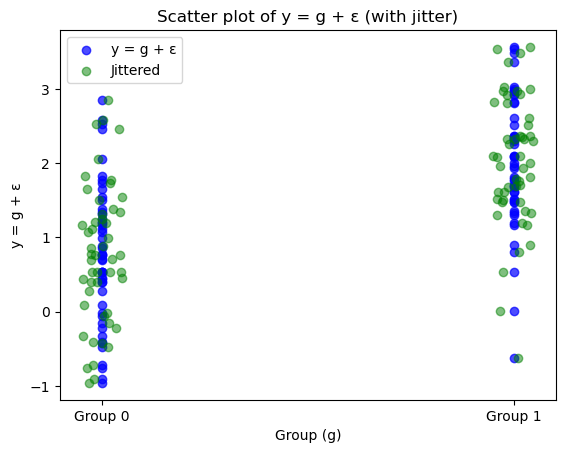

In [67]:
# Scatter plot to visualize y values by group g
plt.scatter(g, y, color='blue', alpha=0.7, label='y = g + ε')

# Add some jitter to the x-axis (group values) for better visualization
g_jitter = g + np.random.uniform(-0.05, 0.05, size=n_samples)
plt.scatter(g_jitter, y, color='green', alpha=0.5, label='Jittered')

# Label the axes and add a title
plt.xlabel('Group (g)')
plt.ylabel('y = g + ε')
plt.title('Scatter plot of y = g + ε (with jitter)')
plt.xticks([0, 1], ['Group 0', 'Group 1'])  # Label the x-ticks

# Add a legend
plt.legend()

# Show the plot
plt.show()

The plot will show two clusters of points:

    Group 0: Points will be centered around y≈1, since y=0+ϵ (and ϵ∼N(1,1)).
    Group 1: Points will be centered around y≈2, since y=1+ϵ.

The scatter plot will show how the random noise affects the values of y in both groups.

In [69]:
# Step 2: Write tstat(y, g) function
def tstat(y, g):
    """
    Compute the two-sample t-test for y split by group g (0 or 1).
    """
    # Separate the data (y) into two groups based on the group labels (g)
    y_group0 = y[g == 0]  # All values of y where the group label is 0
    y_group1 = y[g == 1]  # All values of y where the group label is 1
    
    # Perform a two-sample t-test comparing the means of the two groups (assuming equal variances)
    t_stat, _ = stats.ttest_ind(y_group0, y_group1, equal_var=True)
    
    # Return the t-statistic
    return t_stat

In [70]:
# Step 3: Permute group labels and compute t-statistics under the null hypothesis
def permuted_t_statistics(y, g, n_permutations=1000):
    """
    Compute t-statistics by randomly permuting the group labels (g) to simulate the null distribution.
    """
    # Initialize an array to store the t-statistics for each permutation
    t_stats_null = np.zeros(n_permutations)  # Create an array filled with zeros of length n_permutations
    
    # Loop over the number of permutations
    for i in range(n_permutations):
        # Permute (shuffle) the group labels randomly to break any association between y and g
        g_permuted = np.random.permutation(g)
        
        # Compute the t-statistic for the permuted group labels
        # This simulates what the t-statistic would be under the null hypothesis (no difference between the groups)
        t_stats_null[i] = tstat(y, g_permuted)
    
    # Return the array of t-statistics for the null hypothesis
    return t_stats_null

In [71]:
# Step 4: Assess the p-value by comparing the observed t-statistic with the null distribution
# Compute the observed t-statistic
observed_t_stat = tstat(y, g)

# Generate t-statistics under the null hypothesis using 1000 permutations
n_permutations = 1000
t_stats_null = permuted_t_statistics(y, g, n_permutations)

# Compute the p-value by comparing observed t-stat to the null distribution
p_value = np.mean(np.abs(t_stats_null) >= np.abs(observed_t_stat))

Observed t-statistic: -6.87273
p-value: 0.00000


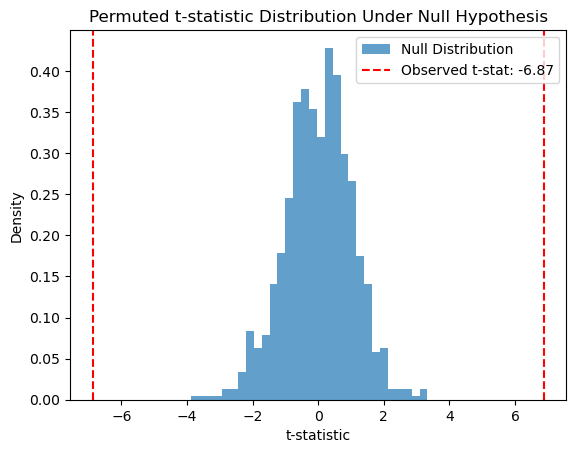

In [72]:
# Step 5: Display the results
print(f"Observed t-statistic: {observed_t_stat:.5f}")
print(f"p-value: {p_value:.5f}")

# Plot the null distribution of t-statistics
plt.hist(t_stats_null, bins=30, density=True, alpha=0.7, label='Null Distribution')
plt.axvline(x=observed_t_stat, color='r', linestyle='--', label=f'Observed t-stat: {observed_t_stat:.2f}')
plt.axvline(x=-observed_t_stat, color='r', linestyle='--')
plt.title('Permuted t-statistic Distribution Under Null Hypothesis')
plt.xlabel('t-statistic')
plt.ylabel('Density')
plt.legend()
plt.show()

This **t-statistic** is large in magnitude (specifically, it's negative, but the magnitude matters here), indicating that there is a significant difference between the means of the two groups (g = 0 and g = 1). The more extreme the t-statistic (far from 0), the greater the evidence against the null hypothesis (which assumes that there is no difference between the two group means).

The **p-value** is extremely small (effectively 0), which means that the probability of observing such an extreme t-statistic under the null hypothesis (assuming there is no true difference between the groups) is essentially 0.

This result aligns with the way the data was generated:

    Group 0 has y=0+ϵ (centered around 1 due to the noise distribution),
    Group 1 has y=1+ϵ (centered around 2).

## Univariate associations (developpement)

Write a function univar_stat(df, target, variables) that computes the parametric statistics
and 𝑝-values between the target variable (provided as as string) and all variables (provided
as a list of string) of the pandas DataFrame df. The target is a quantitative variable but variables may be quantitative or qualitative. The function returns a DataFrame with four columns:
variable, test, value, p_value.

In [76]:
df2.head()

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   salary      46 non-null     int64 
 1   experience  46 non-null     int64 
 2   education   46 non-null     object
 3   management  46 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.6+ KB


To create a function univar_stat that computes parametric statistics and p-values between the target variable (salary) and all other variables in the DataFrame, we need to handle both quantitative (numeric) and qualitative (categorical) variables. We will:

    * Perform a t-test or ANOVA for categorical variables.
    * Perform Pearson's correlation for quantitative variables

Function Design:

    * For categorical variables ("education", "management"), we use t-tests (for binary categories) or ANOVA (for multiple categories).
    * For quantitative variables ("experience"), we compute the Pearson correlation coefficient.

In [79]:
#import pandas as pd
#import numpy as np
#from scipy import stats
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

# Function to compute univariate statistics and p-values between the target variable and given variables
def univar_stat(df, target, variables):
    results = []  # Initialize an empty list to store the results for each variable

    # Loop through the list of variables provided
    for var in variables:
        # Check if the variable is categorical (of dtype 'object')
        if df[var].dtype == 'object':
            # If the variable has two unique categories, perform a t-test
            if df[var].nunique() == 2:
                # Perform a two-sample t-test between the two groups of the categorical variable
                groups = df[var].unique()                       # Identify the unique categories of the variable
                group1 = df[df[var] == groups[0]][target]       # Subset the data where var == first category
                group2 = df[df[var] == groups[1]][target]       # Subset the data where var == second category
                t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)  # Perform Welch's t-test (unequal variances)
                results.append([var, 't-test', t_stat, p_val])  # Append the variable, test name, t-statistic, and p-value to results
            else:
                # If the categorical variable has more than two categories, perform ANOVA
                formula = f'{target} ~ C({var})'               # Create the formula for the OLS regression model
                model = ols(formula, data=df).fit()            # Fit the OLS model using statsmodels
                anova_table = sm.stats.anova_lm(model, typ=2)  # Perform ANOVA to compare means between groups
                F_stat = anova_table['F'].iloc[0]              # Extract the F-statistic from the ANOVA table
                p_val = anova_table['PR(>F)'].iloc[0]          # Extract the p-value for the F-statistic
                results.append([var, 'ANOVA', F_stat, p_val])  # Append the results (variable, test type, F-statistic, p-value)
        
        # Check if the variable is quantitative (numeric dtype)
        elif np.issubdtype(df[var].dtype, np.number):
            # Perform Pearson correlation for numeric variables
            corr, p_val = stats.pearsonr(df[target], df[var])          # Calculate Pearson's correlation coefficient and p-value
            results.append([var, 'Pearson correlation', corr, p_val])  # Append the variable, test name, correlation coefficient, and p-value

    # Convert the results list into a pandas DataFrame with appropriate column names
    result_df = pd.DataFrame(results, columns=['variable', 'test', 'value', 'p_value'])
    return result_df                                                   # Return the DataFrame containing the statistical results

# Example usage:
variables = ['experience', 'education', 'management']  # List of variables to test against the target variable
target = 'salary'                                      # Define the target variable (dependent variable)

# Call the function and store the results in a DataFrame
result_df = univar_stat(df2, target, variables)

# Print the resulting DataFrame with statistical tests
print(result_df)
print()

     variable                 test     value       p_value
0  experience  Pearson correlation  0.538886  1.116574e-04
1   education                ANOVA  2.630597  8.360139e-02
2  management               t-test  6.730863  1.394211e-07



| Variable | Test | Value | p-value | Interpretation |
|:--------:|:--------:|:--------:|:--------:|:---------|
|  experience   |  Pearson correlation   |  0.5389	   |  0.0001   |  There is a moderate positive correlation between experience and salary, which is statistically significant (p-value < 0.05). More experience is associated with higher salary.  |
|  education   |  ANOVA   |  2.6306   |  0.0836   |  Differences in salary based on education level are not statistically significant (p-value > 0.05), though the value is close to the threshold for significance.   |
|  management   |  t-test   |  6.7309   |  0.000000139   |  There is a strong, statistically significant difference in salary based on whether an employee is in management or not, with a very low p-value indicating a highly significant result.   |

##### Summary:

    Experience: A significant positive relationship with salary.
    Education: No significant differences in salary across education levels.
    Management: A highly significant difference in salary between employees in management and those not in management.

## Multiple Comparisons

Given the dataset provided for multiple comparisons, compute the two-sample 𝑡-test (assuming
equal variance) for each (column) feature of the Y array given the two groups defined by grp
variable. You should return two vectors of size n_features: one for the 𝑡-values and one for the
𝑝-values.

In [84]:
# dataset
mu_k = np.array([1, 2, 3])   # Set the means for 3 different groups
sd_k = np.array([1, 1, 1])   # Set the standard deviations for 3 different groups
n_k = np.array([10, 20, 30]) # Set the sample sizes for each group (group 0 has 10, group 1 has 20, group 2 has 30 samples)
grp = [0, 1, 2]              # Define the group labels (three groups: 0, 1, and 2)
n = np.sum(n_k)              # Calculate the total number of samples across all groups

# Generate group labels for each sample based on the group sizes
label = np.hstack([[k] * n_k[k] for k in [0, 1, 2]])

# Initialize an empty array 'y' to store the generated data for all samples
y = np.zeros(n)

# Generate data for each group based on the group's mean and standard deviation
for k in grp:
    y[label == k] = np.random.normal(mu_k[k], sd_k[k], n_k[k])            # Generate random values for group k from a normal distribution

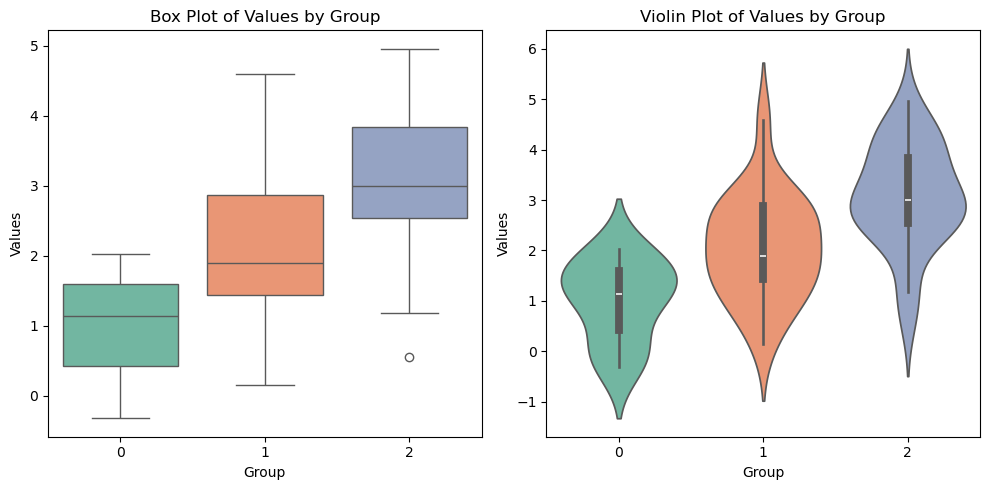

In [85]:
# Convert data to a DataFrame for plotting
import pandas as pd
df3 = pd.DataFrame({'Group': label, 'Values': y})

# Define a color palette for the three groups
colors = sns.color_palette("Set2", 3)  # Use Set1 palette with 3 distinct colors

# Plot the data using a boxplot and violin plot for comparison
plt.figure(figsize=(10, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Values', data=df3, hue='Group', palette=colors, legend=False)
plt.title('Box Plot of Values by Group')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Group', y='Values', data=df3, hue='Group', palette=colors, legend=False)
plt.title('Violin Plot of Values by Group')

plt.tight_layout()
plt.show()

In [86]:
# Create a new index for each group separately to ensure alignment when grouping
df3['index_in_group'] = df3.groupby('Group').cumcount()

# Pivot the DataFrame to align Group 0, 1, and 2 on the same rows
df_wide = df3.pivot(index='index_in_group', columns='Group', values='Values')

# Rename the columns for better readability
df_wide.columns = [f'Group_{int(col)}' for col in df_wide.columns]

# Reset index to get a cleaner display
df_wide = df_wide.reset_index(drop=True)

# Display the resulting DataFrame
print(df_wide)

     Group_0   Group_1   Group_2
0   1.750003  2.608826  4.273108
1   0.230535  1.846724  2.746970
2   1.101398  2.863111  3.034921
3   1.184773  3.087674  2.827816
4   1.637461  0.149600  3.539958
5   1.039062  1.162965  3.891528
6   1.483630  1.874857  4.064328
7   2.019686  0.976290  2.696248
8  -0.051821  1.527035  3.182160
9  -0.320605  0.721321  3.331366
10       NaN  1.561406  4.464203
11       NaN  1.033968  1.213849
12       NaN  2.344624  3.011445
13       NaN  2.902420  2.356931
14       NaN  2.408745  2.467471
15       NaN  4.597745  2.149510
16       NaN  2.938864  3.539121
17       NaN  2.901350  0.549263
18       NaN  1.917897  2.861544
19       NaN  1.693142  1.178457
20       NaN       NaN  2.307493
21       NaN       NaN  2.786257
22       NaN       NaN  2.594358
23       NaN       NaN  3.681148
24       NaN       NaN  4.249665
25       NaN       NaN  4.958159
26       NaN       NaN  2.992485
27       NaN       NaN  4.161085
28       NaN       NaN  4.463947
29       N

#### Perform an ANOVA dataset described bellow
• Compute between and within variances
    • Compute 𝐹 -value: fval
    

• Compare the 𝑝-value with the one obtained by stats.f_oneway using assert np
allclose(arr1, arr2)

In [88]:
# estimate parameters
ybar_k = np.zeros(3)  # Group means
ybar = y.mean()       # Overall mean of the data

# Calculate the mean of each group
for k in grp:
    ybar_k[k] = np.mean(y[label == k])

# Compute between-group variance (S_between)
betweenvar = np.sum([n_k[k] * (ybar_k[k] - ybar) ** 2 for k in grp]) / (len(grp) - 1)

# Compute within-group variance (S_within)
withinvar = np.sum([np.sum((y[label == k] - ybar_k[k]) ** 2) for k in grp]) / (n - len(grp))

# Compute the F-statistic
fval = betweenvar / withinvar
# Compute the p-value using the survival function (1 - `cdf`)
pval = stats.f.sf(fval, (len(grp) - 1), n - len(grp))

# Compute F-value and p-value with scipy's f_oneway
f_val, p_val = stats.f_oneway(y[label == 0], y[label == 1], y[label == 2])

# Compare the F-statistic manually computed with scipy
print(f"F-statistic (manual): {fval:.5f}")
print(f"F-statistic (scipy): {f_val:.5f}\n")

# Compare the p-value manually computed with scipy
print(f"p-value (manual): {pval:.2e}")
print(f"p-value (scipy): {p_val:.2e}\n")

# Check if the manually computed values are close to scipy's results
assert np.allclose((fval, pval), (f_val, p_val)), "Values are not equal"
print("Values are equal.")

F-statistic (manual): 17.76898
F-statistic (scipy): 17.76898

p-value (manual): 1.01e-06
p-value (scipy): 1.01e-06

Values are equal.
